# Testing on synthetic data
Models evaluation on synthetic rhythmic data with:
- multiple component (n_components=1,2,3)
- Different levels of noise (0.3, 0.6, 0.9)
- Replicates as 1 since ARS oly work when there isn't replicates
- We create 10000 line by file

In [ ]:
#import
from rda_package import rda 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
N_TEST=10000
REPLICATES=1

Create dataset and perform rda analysis

In [ ]:
#3h
for i in [1,2,3]:
    for j in [1,2,3]:
        FILENAME=f"c{i}_n0{3*j}.csv"
        folder_in = f'Out/{FILENAME[:-4]}/'
        NOISE=float(0.3*j)
        N_COMPONENTS=int(i)
        rda.synt_rhythmic_data(FILENAME,half_rnd=True,n_test=N_TEST,n_components=N_COMPONENTS,noise=NOISE,replicates=REPLICATES)
        rda.file_rda(folder_in+FILENAME,metrics=True,half_rnd=True,n_components=N_COMPONENTS)

In [ ]:
#3h
i=1
j=3
FILENAME=f"c{i}_n0{3*j}.csv"
print(FILENAME)
folder_in = f'Out/{FILENAME[:-4]}/'
NOISE=float(0.3*j)
N_COMPONENTS=int(i)
rda.file_rda(folder_in+FILENAME,metrics=True,half_rnd=True,n_components=N_COMPONENTS,qvalue=True)

Load files in a dataframe

In [ ]:
import pandas as pd
df_metrics= pd.DataFrame()
for i in [1,2,3]:
    for j in [1,2,3]:
        filename=f"c{i}_n0{3*j}.csv"
        df_tmp = pd.read_csv(f"Out/{filename[:-4]}/metrics_{filename[:-4]}.csv")
        df_tmp['filename']=filename
        df_metrics =pd.concat([df_metrics,df_tmp])

Plot Matthew's Correlation Coefficient for models evaluation

In [ ]:
#mcc models evaluation
ncols = 3
nrows = 3
fig, axes = plt.subplots(ncols = ncols, nrows = nrows, sharey=False)
axes = axes.flatten()         
fig.set_size_inches(30, 30)
sns.set_style("white")
flatui = ['#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
filenames = []
for i in [1]:
    for j in [1,2]:
        filename = f"c{i}_n0{3*j}.csv"
        filenames.append(filename)
for ax, filename in zip(axes,filenames):
            df_metrics = pd.read_csv(f"Out/{filename[:-4]}/qv_metrics_{filename[:-4]}.csv")
            sns.barplot(data=df_metrics, x='model', y='mcc', ax=ax, ci=68, capsize=.2, palette=flatui) # ci=68 --> standard error!
            ax.set_ylabel(f'n_components = {filename[1]}')
            ax.set_xlabel(f'noise = 0.{filename[-5]}')
plt.suptitle(f"Matthew's Correlation Coefficient for models evaluation")
fig.subplots_adjust(top=0.95)
plt.savefig(f"Out/models_mcc.png", bbox_inches="tight", facecolor='white')
plt.show()

Plot models metrics on a dataset

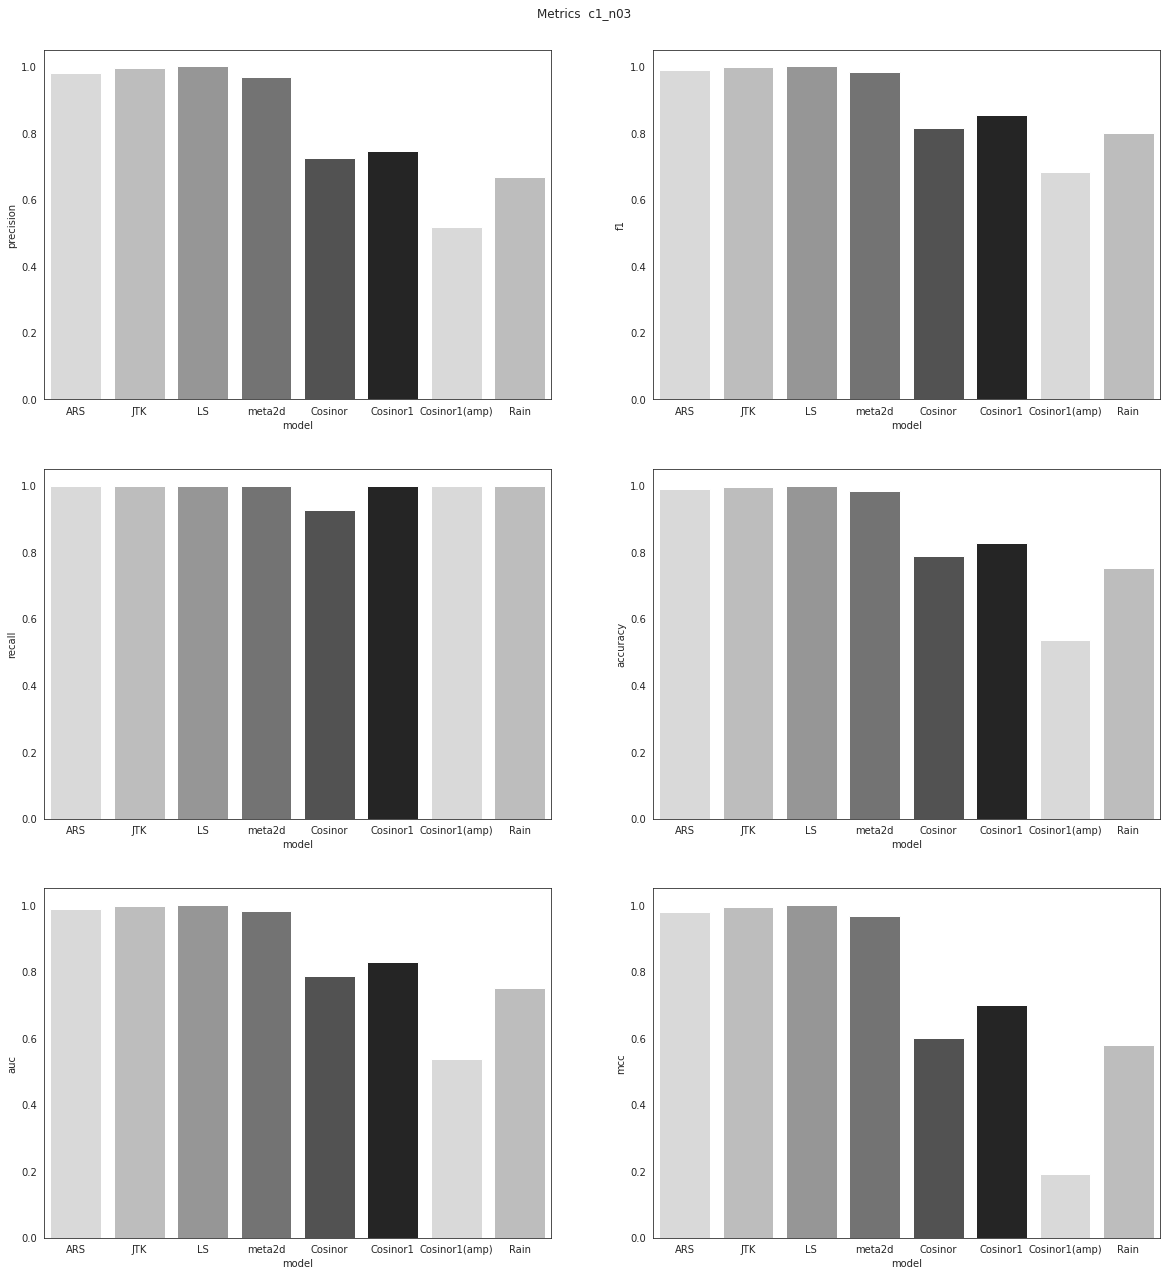

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df_metrics= pd.DataFrame()
for i in [1]:
    for j in [1]:
        filename=f"c{i}_n0{3*j}.csv"
        df_tmp = pd.read_csv(f"Out/{filename[:-4]}/qv_metrics_{filename[:-4]}.csv")
        df_tmp['filename']=filename
        df_metrics =pd.concat([df_metrics,df_tmp])
sns.set_style("white")
flatui = ['#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
ncols = 2
nrows = 3
metrics = ["precision", "f1", "recall", "accuracy", "auc", "mcc"]
filenames = []
for i in [1]:
    for j in [1]:
        filename = f"c{i}_n0{3*j}.csv"
        filenames.append(filename)
for filename in filenames:
    fig, axes = plt.subplots(ncols = ncols, nrows = nrows, sharey=False)
    axes = axes.flatten()         
    fig.set_size_inches(20, 20)
    for ax, metric in zip(axes, metrics):
        sns.barplot(data=df_metrics, x='model', y=metric, ax=ax, ci=68, capsize=.2,palette=flatui) # ci=68 --> standard error!
        ax.set_ylabel(metric)
    plt.suptitle(f'Metrics  {filename[:-4]}')
    fig.subplots_adjust(top=0.95)
    plt.savefig(f"Out/{filename[:-4]}/{filename[:-4]}_metrics.png", bbox_inches="tight", facecolor='white')
    plt.show()

Plot model metrics on different dataset

In [ ]:
#global models evaluation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df_metrics= pd.DataFrame()
for i in [1,2,3]:
    for j in [1,2,3]:
        filename=f"c{i}_n0{3*j}.csv"
        df_tmp = pd.read_csv(f"Out/{filename[:-4]}/metrics_{filename[:-4]}.csv")
        df_tmp['filename']=filename[:-4]
        df_metrics =pd.concat([df_metrics,df_tmp])
sns.set_style("white")
flatui = ['#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
ncols = 2
nrows = 3
models = ['ARS','JTK','LS','meta2d','Cosinor','Rain']
metrics = ["precision", "f1", "recall", "accuracy", "auc", "mcc"]
for model in models:
    fig, axes = plt.subplots(ncols = ncols, nrows = nrows, sharey=False)
    axes = axes.flatten()         
    fig.set_size_inches(16, 16)
    for ax, metric in zip(axes, metrics):
        sns.barplot(data=df_metrics, x='filename', y=metric, ax=ax, ci=68, capsize=.2, palette=flatui) # ci=68 --> standard error!
        #ax.set_xticklabels(df['filename'].to_numpy(), rotation=45)
        ax.set_ylabel(metric)
    plt.suptitle(model)
    fig.subplots_adjust(top=0.95)
    plt.savefig(f"Out/{model}_metrics.png", bbox_inches="tight",facecolor='white')

    plt.show()

## Plot standard deviation

Plot table of the global standard deviation of each models

In [ ]:
#global std
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
df_after_ind= pd.DataFrame()
for i in [1,2,3]:
    for j in [1,2,3]:
        filename=f"c{i}_n0{3*j}.csv"
        df_after = pd.read_csv(f"Out/{filename[:-4]}/metrics_{filename[:-4]}.csv")
        df_after['filename']=filename
        df_after_ind =pd.concat([df_after_ind,df_after])
sns.set_style("white")
flatui = ['#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
models = ['ARS','JTK','LS','meta2d','Cosinor','Rain']
metrics = ["precision", "f1", "recall", "accuracy", "auc"]
df = pd.DataFrame(columns = ['model','avg_std'], dtype=float)
for model in models:
    res=[]
    for metric in metrics:
        std = df_after_ind[df_after_ind['model']==model][metric].std()
        res.append(std)
        #print(model,metric,std°
    #print(res)
    df =df.append({'model':model,'avg_std': np.array(res).mean()}, ignore_index=True)
fig1 = ff.create_table(df.sort_values(by='avg_std'))
fig1.update_layout(width=500, height=300)
fig1.show()

Plot table of standard deviation for a fixed number of cosinor components

In [ ]:
#std fixed number of components
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
for i in [1,2,3]:
    df_metrics= pd.DataFrame()
    df = pd.DataFrame(columns = ['model'], dtype=float)
    for j in [1,2,3]:
        filename=f"c{i}_n0{3*j}.csv"
        df_tmp = pd.read_csv(f"Out/{filename[:-4]}/metrics_{filename[:-4]}.csv")
        df_tmp['filename']=filename
        df_metrics =pd.concat([df_metrics,df_tmp])
    models = ['ARS','JTK','LS','meta2d','Cosinor','Rain']
    metrics = ["precision", "f1", "recall", "accuracy", "auc"]
    sns.set_style("white")
    flatui = ['#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
    df = pd.DataFrame(columns = ['model'], dtype=float)
    #print(df_after_ind)
    for model in models:
        res=[]
        for metric in metrics:
            std = df_metrics[df_metrics['model']==model][metric].std()
            res.append(std)
            #print(model,metric,std)
        df =df.append({'model':model,f'avg_std_c{i}': np.array(res).mean()}, ignore_index=True)
    fig1 = ff.create_table(df.sort_values(by=f'avg_std_c{i}'))
    fig1.update_layout(width=1000, height=300)
    fig1.show()

Plot table of standard deviation for a fixed level of noise

In [ ]:
#std fixe tmp
import pandas as pd
import numpy as np
import plotly.figure_factory as ff

for j in [1,2,3]:
    df_metrics= pd.DataFrame()
    df = pd.DataFrame(columns = ['model'], dtype=float)
    for i in [1,2,3]:
        filename=f"c{i}_n0{3*j}.csv"
        df_tmp = pd.read_csv(f"Out/{filename[:-4]}/metrics_{filename[:-4]}.csv")
        df_tmp['filename']=filename
        df_metrics =pd.concat([df_metrics,df_tmp])
    models = ['ARS','JTK','LS','meta2d','Cosinor','Rain']
    metrics = ["precision", "f1", "recall", "accuracy", "auc"]
    df = pd.DataFrame(columns = ['model'], dtype=float)
    #print(df_after_ind)
    for model in models:
        res=[]
        for metric in metrics:
            std = df_metrics[df_metrics['model']==model][metric].std()
            res.append(std)
            #print(model,metric,std)
        df =df.append({'model':model,f'avg_std_n0{3*j}': np.array(res).mean()}, ignore_index=True)
    fig1 = ff.create_table(df.sort_values(by=f'avg_std_n0{3*j}'))
    fig1.update_layout(width=1000, height=300)
    fig1.show()